In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1
df = pd.read_csv("data/medical_examination.csv")

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# 2
df['overweight'] = df["weight"] / ((df["height"] / 100) ** 2) > 25
df['overweight'] = df['overweight'].astype(int)

In [5]:
# 3
def chol_gluc_norm(val):
    if val == 1:
        return 0
    else:
        return 1

df.gluc = df.gluc.apply(chol_gluc_norm)
df.cholesterol = df.cholesterol.apply(chol_gluc_norm)

In [6]:
# 4
def draw_cat_plot():
    # 5 and 6
    df_cat = pd.melt(df,
                 id_vars=["cardio"],
                 value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
                )

    # 7 and 8
    fig = sns.catplot(
        data = df_cat, 
        kind='count',  
        x='variable', 
        hue='value', 
        col='cardio').set(ylabel = 'total').fig

    # 9
    # fig.savefig('catplot.png')
    # return fig

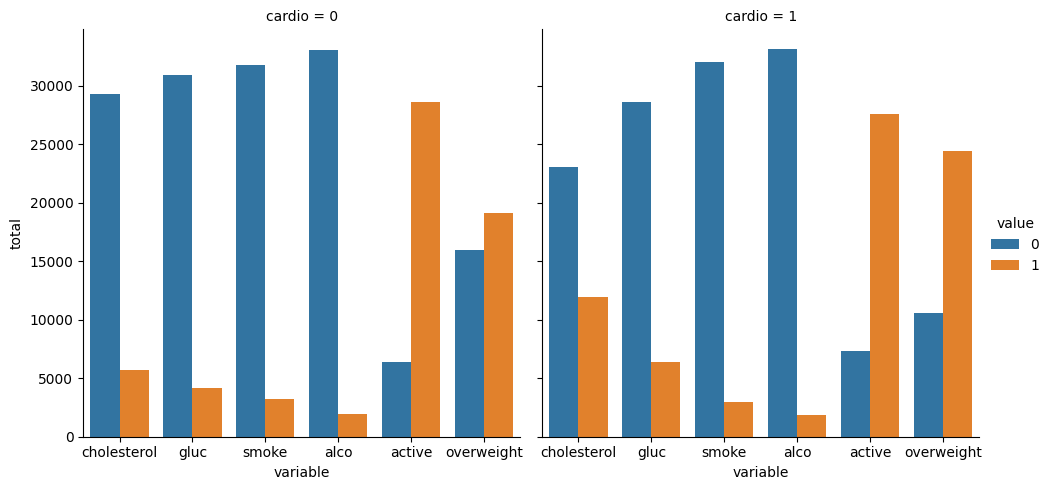

In [7]:
# TESTING ONLY
draw_cat_plot()

In [8]:
# 10
def draw_heat_map():
    # 11

    # filter out patients where diastolic pressure is higher than systolic
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])]

    # filter out patients where height is less than the 2.5th percentile
    df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025))]

    # filter out patients where height is more than the 97.5th percentile
    df_heat = df_heat[(df_heat['height'] <= df_heat['height'].quantile(0.975))]

    # filter out patients where weight is less than the 2.5th percentile
    df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025))]

    # filter out patients where weight is more than the 97.5th percentile
    df_heat = df_heat[(df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr))

    # 14
    fig, ax = plt.subplots()

    # 15
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', square=True)
    

    # 16
    #fig.savefig('heatmap.png')
    # return fig

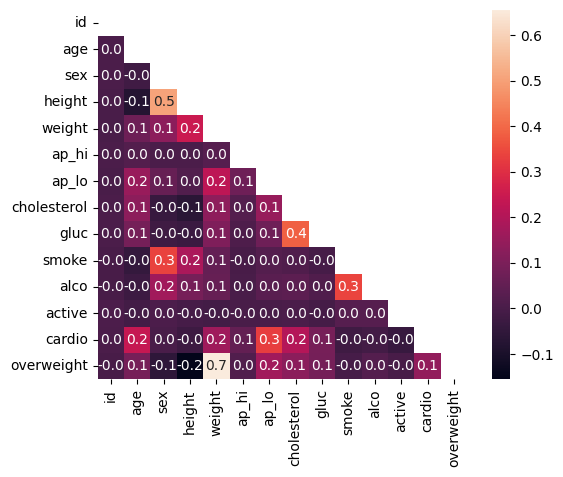

In [9]:
# TESTING ONLY
draw_heat_map()